In [1]:
import preprocessing.preprocess as preprocess
import pandas as pd
import model.naive_bayesian_classifier as NB
import model.random_forest as RF
import model.support_vector_machine as SVC

In [2]:
fake_news = preprocess.parse_dataset("Fake.csv", "FAKE")
real_news = preprocess.parse_dataset("True.csv", "REAL")

fake_news_all_tokens, fake_news_tokens_per_article = preprocess.tokenize(fake_news, "fake_news")
real_news_all_tokens, real_news_tokens_per_article = preprocess.tokenize(real_news, "real_news")

# join tokens and data together
all_tokens = fake_news_all_tokens + real_news_all_tokens
tokens_per_article = fake_news_tokens_per_article + real_news_tokens_per_article

all_news = pd.concat([fake_news, real_news], axis=0)

# print("Preview of parsed data:")
# print(all_news)

# join the data and pass it to split data
X_train, X_test, y_train, y_test = preprocess.split_and_preprocess(all_tokens,tokens_per_article, all_news)
%store X_train
%store X_test
%store y_train
%store y_test

Parsing news dataset from file: Fake.csv
Setting label for news dataset: FAKE
Parsing news dataset from file: True.csv
Setting label for news dataset: REAL
Tokenizing fake_news dataset, this may take a few minutes...
Tokenizing real_news dataset, this may take a few minutes...
Splitting data: 70% training, 30% testing
(31406,) (13461,)
(31406, 1) (13461, 1)
Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (DataFrame)
Stored 'y_test' (DataFrame)


Model accuracy is: 92.3%
Model mean Squared Error is: 2.77%


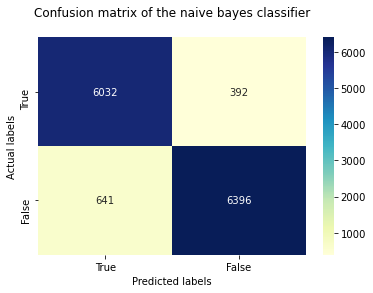

In [3]:
# Naive Bayes Classifier
NB.Naive_Bayesian(X_train, X_test, y_train, y_test)

This part may take a while...
Performing GridSearch with 200 estimators at depth value: 50
Performing GridSearch with 200 estimators at depth value: 60
Performing GridSearch with 200 estimators at depth value: 70

Random Forest Accuracy is: 0.9972513186241735
Random Forest Mean Squared Error is: 0.05242786831282063



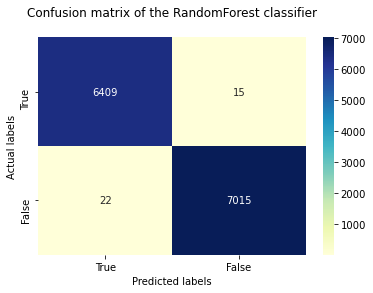

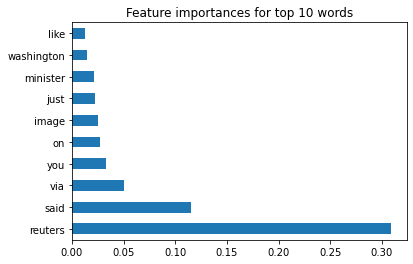

In [4]:
RF.Random_Forest(X_train, X_test, y_train, y_test)

Fitting data to SVC, this may take a while...
SVC Accuracy is: 0.9881138102666964
Random Forest Mean Squared Error is: 0.10902380351695504


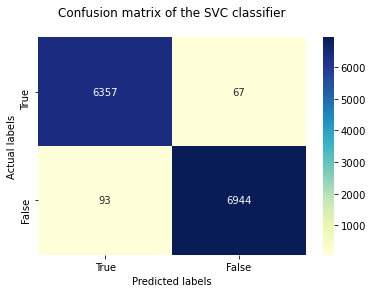

In [5]:
SVC.support_vector_machine(X_train, X_test, y_train, y_test)